# 特征抽取结果

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
%matplotlib inline

## 加载数据

In [33]:
df = pd.read_csv('data.csv',index_col=0)
rumor_df = df[df['rumor']==1]
non_rumor_df = df[df['rumor']==0]
vocab_dict = pkl.load(open('data/vocab.pkl','rb'))
sentiment_dict = np.load('sentiment_dict.npy',allow_pickle=True).item()
fastText_vectors_300 = np.load('data/embedding_cc.zh.300.npz',allow_pickle=True)['embeddings']
fastText_vectors_300_sentiment = np.load('data/embedding_cc.zh.300_sentiment.npz',allow_pickle=True)['embeddings']
fastText_vectors_100 = fastText_vectors_300[:,:100] 
fastText_vectors_100_sentiment = fastText_vectors_300_sentiment[:,:100]
pca_vectors_100 = np.load('data/embedding_pca.zh.100.npz',allow_pickle=True)['embeddings']
pca_vectors_100_sentiment = np.load('data/embedding_pca.zh.100_sentiment.npz',allow_pickle=True)['embeddings']
pca_vectors_300 = np.load('data/embedding_pca.zh.300.npz',allow_pickle=True)['embeddings']
pca_vectors_300_sentiment = np.load('data/embedding_pca.zh.300_sentiment.npz',allow_pickle=True)['embeddings']
ldia_vectors_100 = np.load('data/embedding_ldia.zh.100.npz',allow_pickle=True)['embeddings']
ldia_vectors_100_sentiment = np.load('data/embedding_ldia.zh.100_sentiment.npz',allow_pickle=True)['embeddings']
ldia_vectors_300 = np.load('data/embedding_ldia.zh.300.npz',allow_pickle=True)['embeddings']
ldia_vectors_300_sentiment = np.load('data/embedding_ldia.zh.300_sentiment.npz',allow_pickle=True)['embeddings']

## 展示情感强度得分

In [34]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
def snow(rumor_index,rumor_sentiments,non_rumor_index,non_rumor_sentiments):
    fig, ax = plt.subplots()
    #c=np.squeeze(rumor_sentiments)
    scatter1 = ax.scatter(rumor_index,rumor_sentiments, marker='.',label='谣言',s=1)
    scatter2 = ax.scatter(non_rumor_index,non_rumor_sentiments,label='非谣言', marker='.',s=1)
    legend1 = ax.legend(*scatter1.legend_elements())
    legend2 = ax.legend(*scatter2.legend_elements())
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    plt.xlabel('文档序号')
    plt.ylabel('情感强度得分')
    plt.legend()
    plt.show()

/Users/stevenyu/opt/anaconda3/envs/d2l/lib/python3.9/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


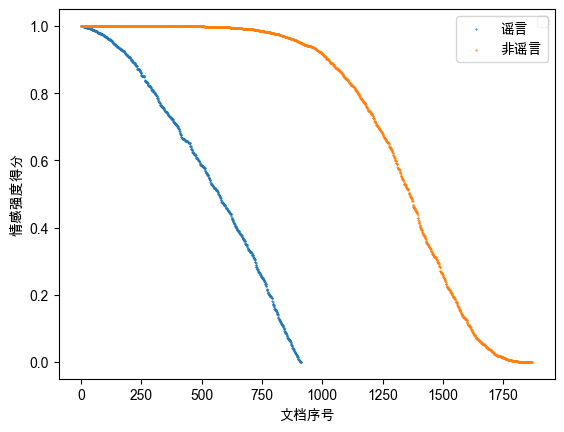

In [35]:
rumor_sentiments=rumor_df.sort_values(by='sentiments',ascending=False)["sentiments"].values
rumor_index = np.arange(len(rumor_sentiments))
non_rumor_sentiments=non_rumor_df.sort_values(by='sentiments',ascending=False)["sentiments"].values
non_rumor_index = np.arange(len(non_rumor_sentiments))
snow(rumor_index,rumor_sentiments,non_rumor_index,non_rumor_sentiments)

In [36]:
from builtins import bytes, range
from sklearn.manifold import TSNE
rumor_seg_text = rumor_df['seg_text'].values
non_rumor_seg_text = non_rumor_df['seg_text'].values
for i in range(len(rumor_seg_text)):
    rumor_seg_text[i] = rumor_seg_text[i].split(' ')
    for j in range(len(rumor_seg_text[i])):
        if rumor_seg_text[i][j] in vocab_dict:
            rumor_seg_text[i][j] = vocab_dict[rumor_seg_text[i][j]]
        else:
            rumor_seg_text[i][j] = len(vocab_dict)-2

for i in range(len(non_rumor_seg_text)):
    non_rumor_seg_text[i] = non_rumor_seg_text[i].split(' ')
    for j in range(len(non_rumor_seg_text[i])):
        if non_rumor_seg_text[i][j] in vocab_dict:
            non_rumor_seg_text[i][j] = vocab_dict[non_rumor_seg_text[i][j]]
        else:
            non_rumor_seg_text[i][j] = len(vocab_dict)-2

In [37]:
fastText_vectors_100_rumor = np.zeros((len(rumor_seg_text),100))
fastText_vectors_100_non_rumor = np.zeros((len(non_rumor_seg_text),100))
fastText_vectors_100_sentiment_rumor = np.zeros((len(rumor_seg_text),100))
fastText_vectors_100_sentiment_non_rumor = np.zeros((len(non_rumor_seg_text),100))
fastText_vectors_300_rumor = np.zeros((len(rumor_seg_text),300))
fastText_vectors_300_non_rumor = np.zeros((len(non_rumor_seg_text),300))
fastText_vectors_300_sentiment_rumor = np.zeros((len(rumor_seg_text),300))
fastText_vectors_300_sentiment_non_rumor = np.zeros((len(non_rumor_seg_text),300))
pca_vectors_100_rumor = np.zeros((len(rumor_seg_text),100))
pca_vectors_100_non_rumor = np.zeros((len(non_rumor_seg_text),100))
pca_vectors_100_sentiment_rumor = np.zeros((len(rumor_seg_text),100))
pca_vectors_100_sentiment_non_rumor = np.zeros((len(non_rumor_seg_text),100))
pca_vectors_300_rumor = np.zeros((len(rumor_seg_text),300))
pca_vectors_300_non_rumor = np.zeros((len(non_rumor_seg_text),300))
pca_vectors_300_sentiment_rumor = np.zeros((len(rumor_seg_text),300))
pca_vectors_300_sentiment_non_rumor = np.zeros((len(non_rumor_seg_text),300))
ldia_vectors_100_rumor = np.zeros((len(rumor_seg_text),100))
ldia_vectors_100_non_rumor = np.zeros((len(non_rumor_seg_text),100))    
ldia_vectors_100_sentiment_rumor = np.zeros((len(rumor_seg_text),100))
ldia_vectors_100_sentiment_non_rumor = np.zeros((len(non_rumor_seg_text),100))
ldia_vectors_300_rumor = np.zeros((len(rumor_seg_text),300))
ldia_vectors_300_non_rumor = np.zeros((len(non_rumor_seg_text),300))
ldia_vectors_300_sentiment_rumor = np.zeros((len(rumor_seg_text),300))
ldia_vectors_300_sentiment_non_rumor = np.zeros((len(non_rumor_seg_text),300))
for i in range(len(rumor_seg_text)):
    for j in range(len(rumor_seg_text[i])):
        fastText_vectors_100_rumor[i] += fastText_vectors_100[rumor_seg_text[i][j]]
        fastText_vectors_300_rumor[i] += fastText_vectors_300[rumor_seg_text[i][j]]
        pca_vectors_100_rumor[i] += pca_vectors_100[rumor_seg_text[i][j]]
        pca_vectors_300_rumor[i] += pca_vectors_300[rumor_seg_text[i][j]]
        ldia_vectors_100_rumor[i] += ldia_vectors_100[rumor_seg_text[i][j]]
        ldia_vectors_300_rumor[i] += ldia_vectors_300[rumor_seg_text[i][j]]
        fastText_vectors_100_sentiment_rumor[i] += fastText_vectors_100_sentiment[rumor_seg_text[i][j]] 
        fastText_vectors_300_sentiment_rumor[i] += fastText_vectors_300_sentiment[rumor_seg_text[i][j]]
        pca_vectors_100_sentiment_rumor[i] += pca_vectors_100_sentiment[rumor_seg_text[i][j]]
        pca_vectors_300_sentiment_rumor[i] += pca_vectors_300_sentiment[rumor_seg_text[i][j]]
        ldia_vectors_100_sentiment_rumor[i] += ldia_vectors_100_sentiment[rumor_seg_text[i][j]]
        ldia_vectors_300_sentiment_rumor[i] += ldia_vectors_300_sentiment[rumor_seg_text[i][j]]
    fastText_vectors_100_rumor[i] /= len(rumor_seg_text[i])
    fastText_vectors_300_rumor[i] /= len(rumor_seg_text[i])
    pca_vectors_100_rumor[i] /= len(rumor_seg_text[i])
    pca_vectors_300_rumor[i] /= len(rumor_seg_text[i])
    ldia_vectors_100_rumor[i] /= len(rumor_seg_text[i])
    ldia_vectors_300_rumor[i] /= len(rumor_seg_text[i])
    fastText_vectors_100_sentiment_rumor[i] /= len(rumor_seg_text[i])
    fastText_vectors_300_sentiment_rumor[i] /= len(rumor_seg_text[i])
    pca_vectors_100_sentiment_rumor[i] /= len(rumor_seg_text[i])
    pca_vectors_300_sentiment_rumor[i] /= len(rumor_seg_text[i])
    ldia_vectors_100_sentiment_rumor[i]     /= len(rumor_seg_text[i])
    ldia_vectors_300_sentiment_rumor[i]    /= len(rumor_seg_text[i])

for i in range(len(non_rumor_seg_text)):
    for j in range(len(non_rumor_seg_text[i])):
        fastText_vectors_100_non_rumor[i] += fastText_vectors_100[non_rumor_seg_text[i][j]]
        fastText_vectors_300_non_rumor[i] += fastText_vectors_300[non_rumor_seg_text[i][j]]
        pca_vectors_100_non_rumor[i] += pca_vectors_100[non_rumor_seg_text[i][j]]
        pca_vectors_300_non_rumor[i] += pca_vectors_300[non_rumor_seg_text[i][j]]
        ldia_vectors_100_non_rumor[i] += ldia_vectors_100[non_rumor_seg_text[i][j]]
        ldia_vectors_300_non_rumor[i] += ldia_vectors_300[non_rumor_seg_text[i][j]]
        fastText_vectors_100_sentiment_non_rumor[i] += fastText_vectors_100_sentiment[non_rumor_seg_text[i][j]] 
        fastText_vectors_300_sentiment_non_rumor[i] += fastText_vectors_300_sentiment[non_rumor_seg_text[i][j]]
        pca_vectors_100_sentiment_non_rumor[i] += pca_vectors_100_sentiment[non_rumor_seg_text[i][j]]
        pca_vectors_300_sentiment_non_rumor[i] += pca_vectors_300_sentiment[non_rumor_seg_text[i][j]]
        ldia_vectors_100_sentiment_non_rumor[i] += ldia_vectors_100_sentiment[non_rumor_seg_text[i][j]]
        ldia_vectors_300_sentiment_non_rumor[i] += ldia_vectors_300_sentiment[non_rumor_seg_text[i][j]]

    fastText_vectors_100_non_rumor[i] /= len(non_rumor_seg_text[i])
    fastText_vectors_300_non_rumor[i] /= len(non_rumor_seg_text[i])
    pca_vectors_100_non_rumor[i] /= len(non_rumor_seg_text[i])
    pca_vectors_300_non_rumor[i] /= len(non_rumor_seg_text[i])
    ldia_vectors_100_non_rumor[i] /= len(non_rumor_seg_text[i])
    ldia_vectors_300_non_rumor[i] /= len(non_rumor_seg_text[i])
    fastText_vectors_100_sentiment_non_rumor[i] /= len(non_rumor_seg_text[i])
    fastText_vectors_300_sentiment_non_rumor[i] /= len(non_rumor_seg_text[i])
    pca_vectors_100_sentiment_non_rumor[i] /= len(non_rumor_seg_text[i])
    pca_vectors_300_sentiment_non_rumor[i] /= len(non_rumor_seg_text[i])
    ldia_vectors_100_sentiment_non_rumor[i]    /= len(non_rumor_seg_text[i])
    ldia_vectors_300_sentiment_non_rumor[i]   /= len(non_rumor_seg_text[i])

In [112]:
def tsne_plot(rumor, non_rumor,title):
    tsne = TSNE(n_components=2, learning_rate=100,random_state=0).fit_transform(rumor)
    plt.scatter(tsne[:,0], tsne[:,1], c='r', label='rumor',s=1)
    tsne = TSNE(n_components=2, learning_rate=100,random_state=0).fit_transform(non_rumor)
    plt.scatter(tsne[:,0], tsne[:,1], c='b', label='non_rumor',s=1)
    plt.title(title)
    plt.legend()
    #plt.show()
    plt.tight_layout()

def tsne_plot_3d(ax,rumor, non_rumor,title):
    tsne = TSNE(n_components=3, learning_rate=100,random_state=0).fit_transform(rumor)
        #坐标缩放到[0,1]区间
    x_min, x_max = np.min(tsne,axis=0), np.max(tsne,axis=0)
    tsne = (tsne - x_min) / (x_max - x_min)
    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    
    for i in range(tsne.shape[0]):
        ax.text(tsne[i, 0],tsne[i, 1], tsne[i,2],".",
                 color='r',
                 fontdict={'weight': 'bold', 'size': 9})
    tsne = TSNE(n_components=3, learning_rate=100,random_state=0).fit_transform(non_rumor)
        #坐标缩放到[0,1]区间
    x_min, x_max = np.min(tsne,axis=0), np.max(tsne,axis=0)
    tsne = (tsne - x_min) / (x_max - x_min)
    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    for i in range(tsne.shape[0]):
        ax.text(tsne[i, 0],tsne[i, 1], tsne[i,2],".",
                 color='b',
                 fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    #plt.legend()


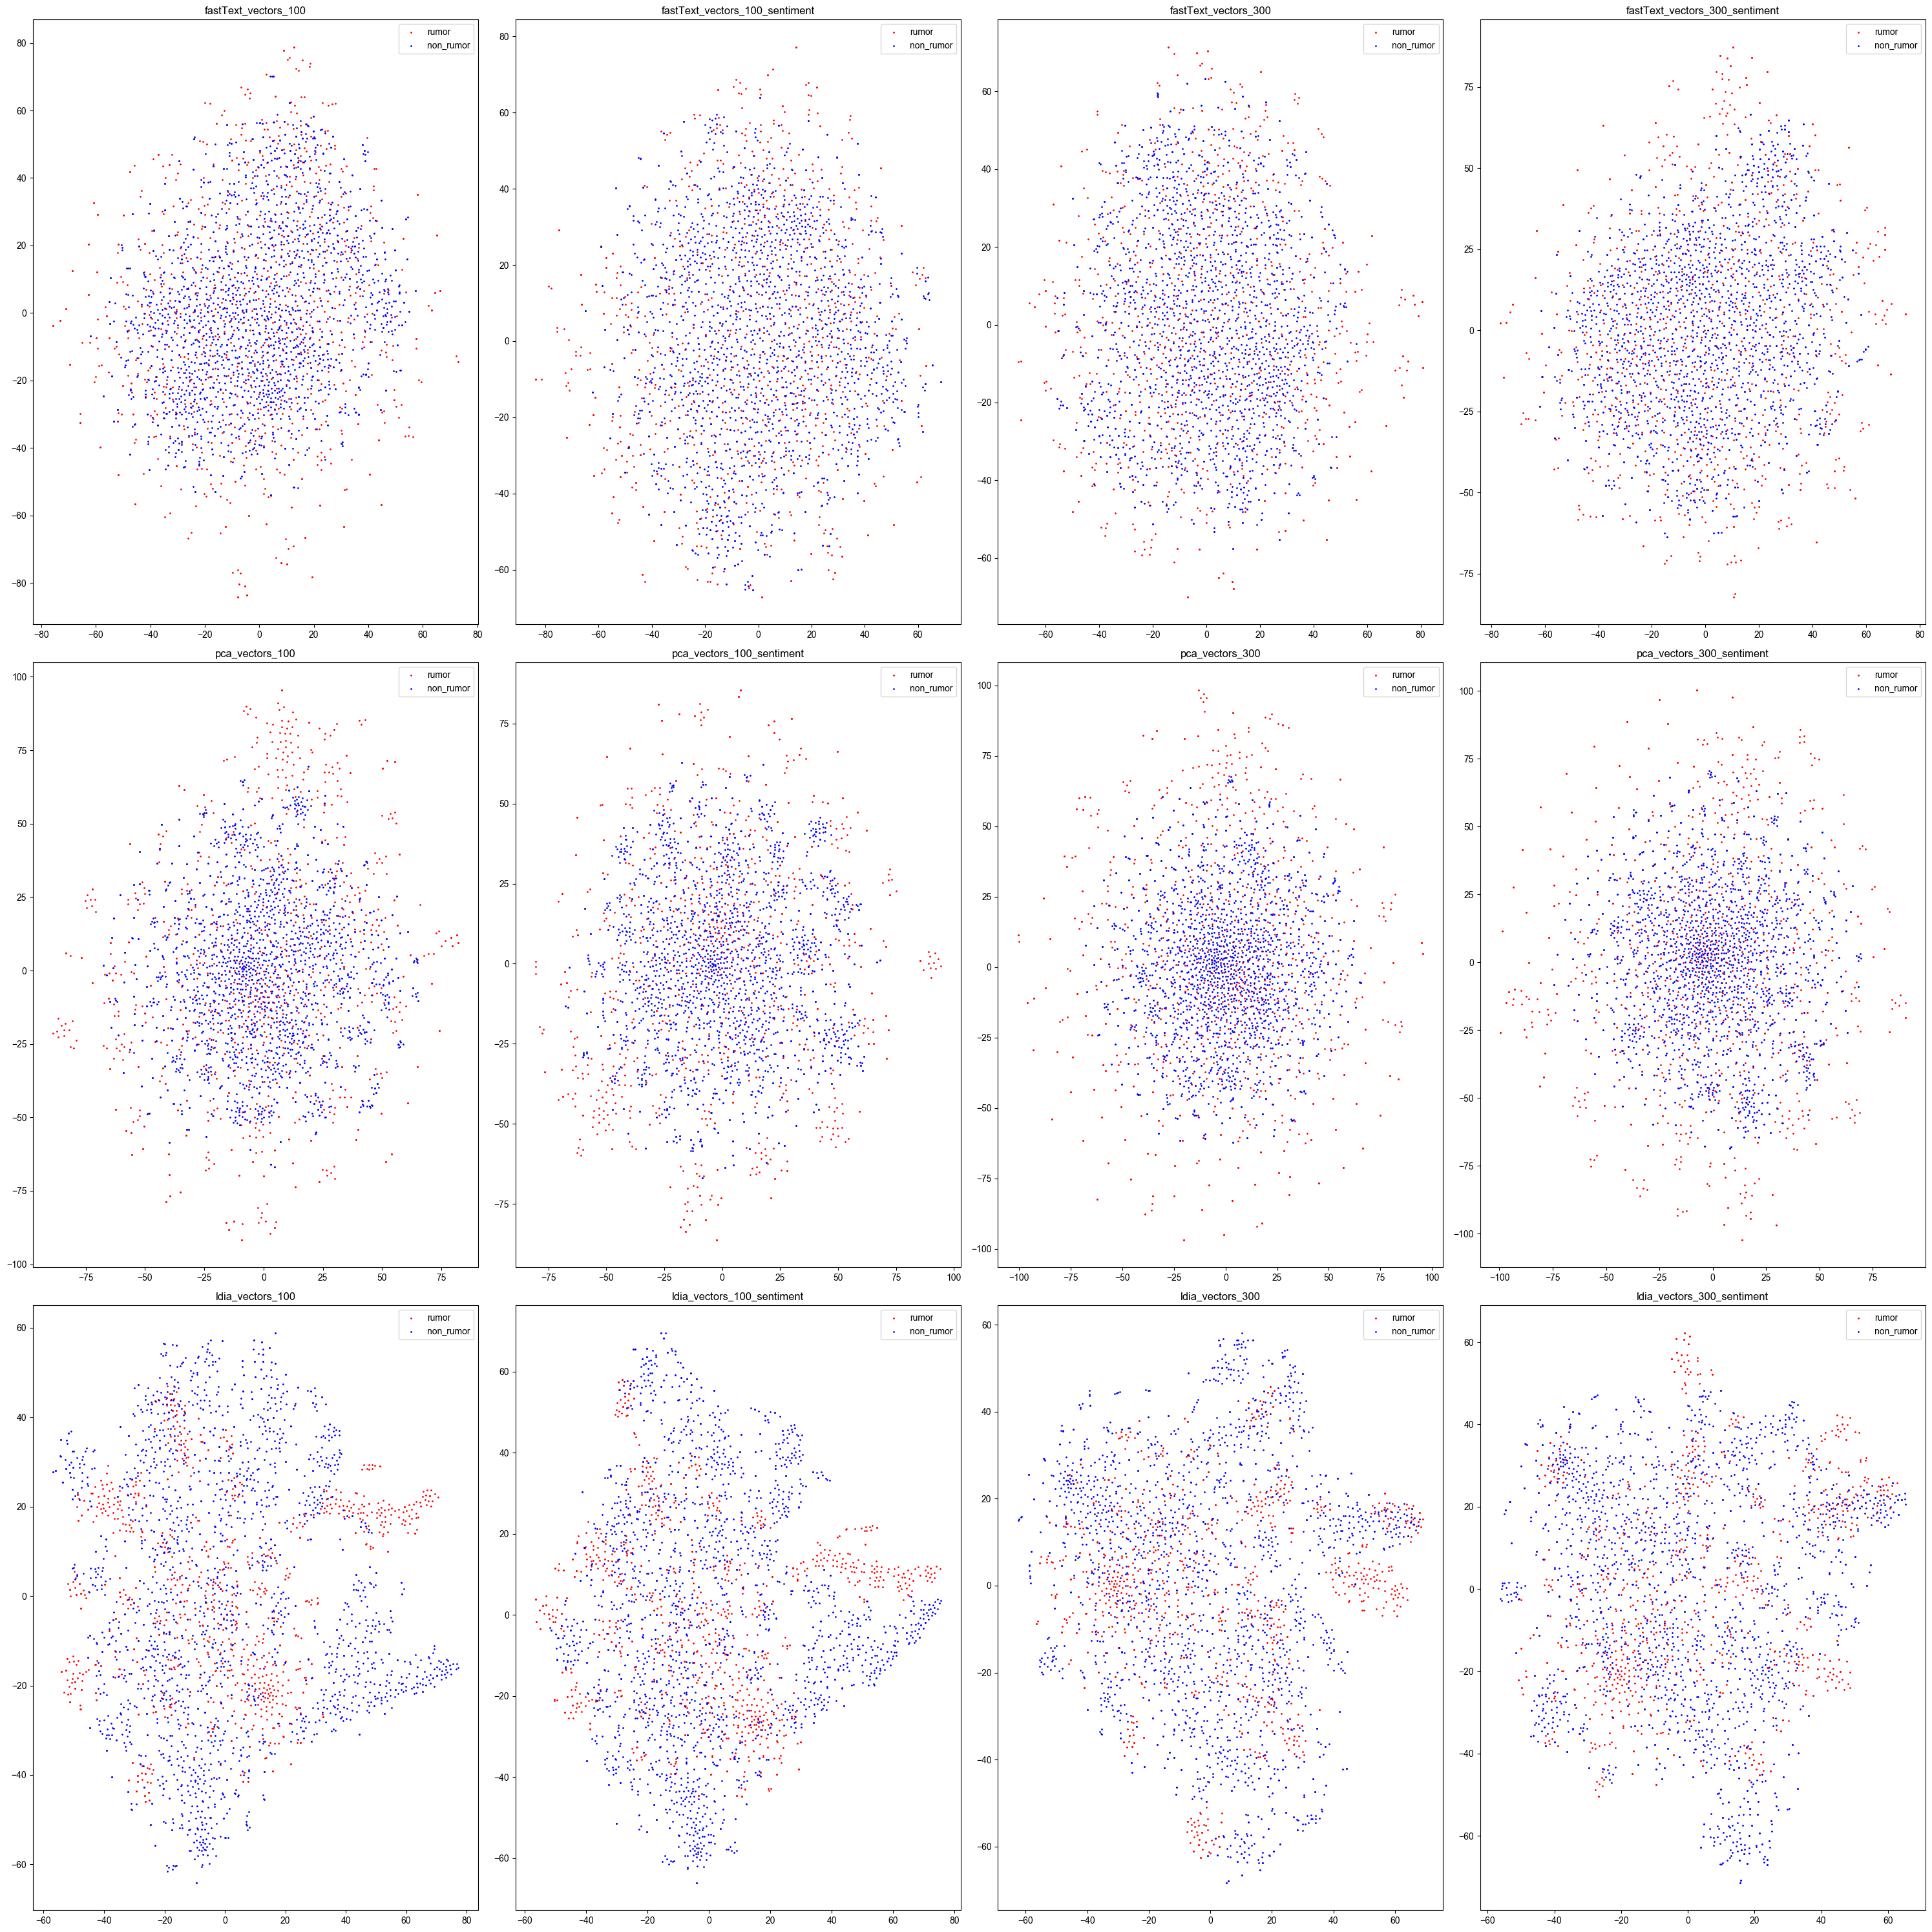

In [84]:
rumor_list = [fastText_vectors_100_rumor,fastText_vectors_100_sentiment_rumor,fastText_vectors_300_rumor,fastText_vectors_300_sentiment_rumor,pca_vectors_100_rumor,pca_vectors_100_sentiment_rumor,pca_vectors_300_rumor,pca_vectors_300_sentiment_rumor,ldia_vectors_100_rumor,ldia_vectors_100_sentiment_rumor,ldia_vectors_300_rumor,ldia_vectors_300_sentiment_rumor]
non_rumor_list = [fastText_vectors_100_non_rumor,fastText_vectors_100_sentiment_non_rumor,fastText_vectors_300_non_rumor,fastText_vectors_300_sentiment_non_rumor,pca_vectors_100_non_rumor,pca_vectors_100_sentiment_non_rumor,pca_vectors_300_non_rumor,pca_vectors_300_sentiment_non_rumor,ldia_vectors_100_non_rumor,ldia_vectors_100_sentiment_non_rumor,ldia_vectors_300_non_rumor,ldia_vectors_300_sentiment_non_rumor]     
title_list = ["fastText_vectors_100","fastText_vectors_100_sentiment","fastText_vectors_300","fastText_vectors_300_sentiment","pca_vectors_100","pca_vectors_100_sentiment","pca_vectors_300","pca_vectors_300_sentiment","ldia_vectors_100","ldia_vectors_100_sentiment","ldia_vectors_300","ldia_vectors_300_sentiment"]
plt.figure(figsize=(30,30))
for i in range(len(title_list)):
    plt.subplot(3,4,i+1)
    tsne_plot(rumor_list[i],non_rumor_list[i],title_list[i])

In [115]:
plt.figure(figsize=(30,30))
for i in range(4,len(title_list)):
    ax=plt.subplot(3,4,i+1,projection='3d')
    tsne_plot_3d(ax,rumor_list[i],non_rumor_list[i],title_list[i])

/var/folders/f0/6j6j3w814n53skbt2s4d8p5m0000gn/T/ipykernel_51358/3659633305.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(3,4,i+1,projection='3d')


KeyboardInterrupt: 

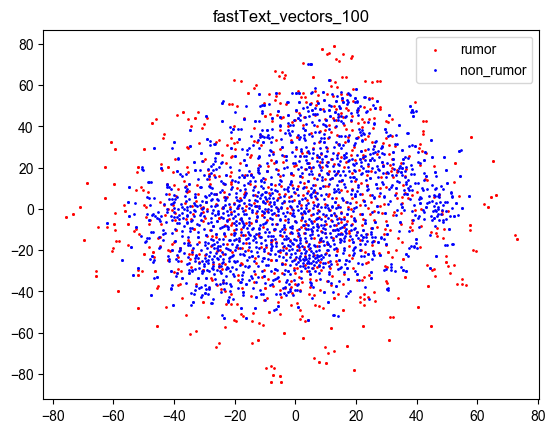

In [39]:
tsne_plot(fastText_vectors_100_rumor, fastText_vectors_100_non_rumor, 'fastText_vectors_100')

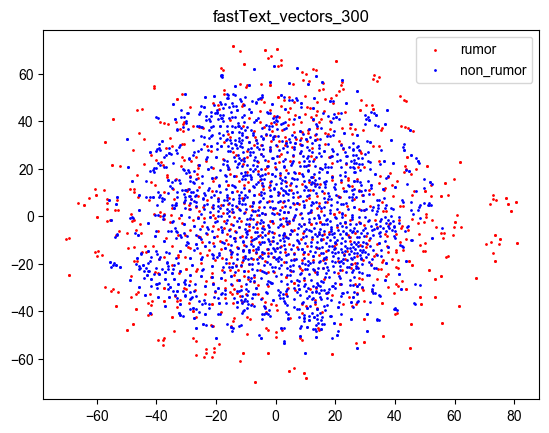

In [40]:
tsne_plot(fastText_vectors_300_rumor, fastText_vectors_300_non_rumor, 'fastText_vectors_300')

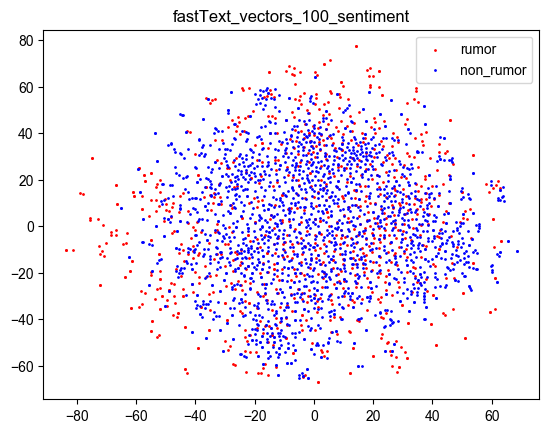

In [41]:
tsne_plot(fastText_vectors_100_sentiment_rumor, fastText_vectors_100_sentiment_non_rumor,'fastText_vectors_100_sentiment')

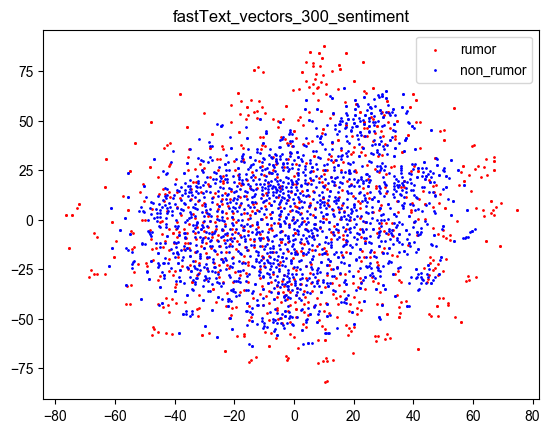

In [42]:
tsne_plot(fastText_vectors_300_sentiment_rumor, fastText_vectors_300_sentiment_non_rumor,'fastText_vectors_300_sentiment')

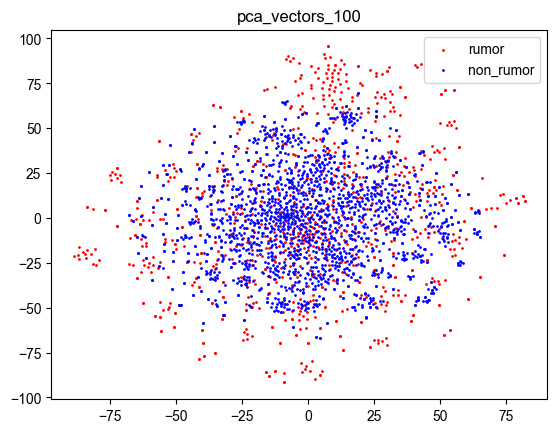

In [43]:
tsne_plot(pca_vectors_100_rumor, pca_vectors_100_non_rumor, 'pca_vectors_100')

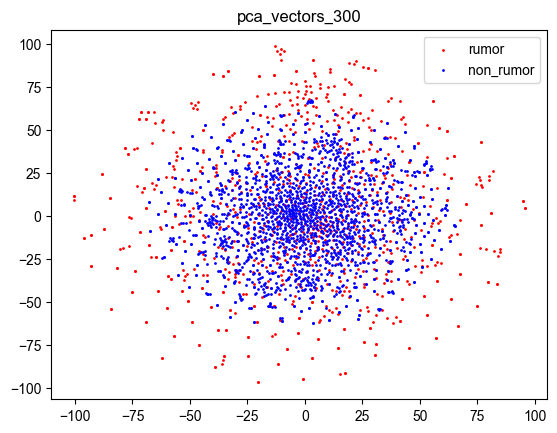

In [44]:
tsne_plot(pca_vectors_300_rumor, pca_vectors_300_non_rumor, 'pca_vectors_300')

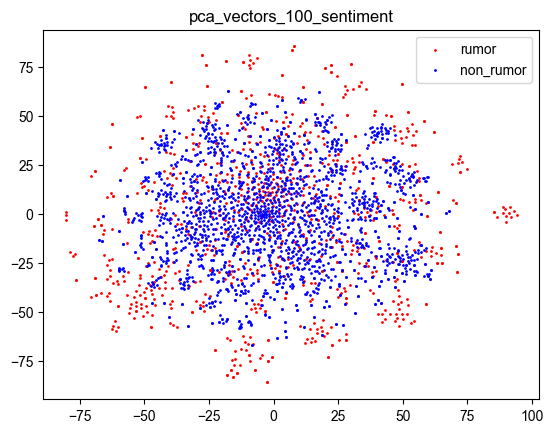

In [45]:
tsne_plot(pca_vectors_100_sentiment_rumor, pca_vectors_100_sentiment_non_rumor, 'pca_vectors_100_sentiment')

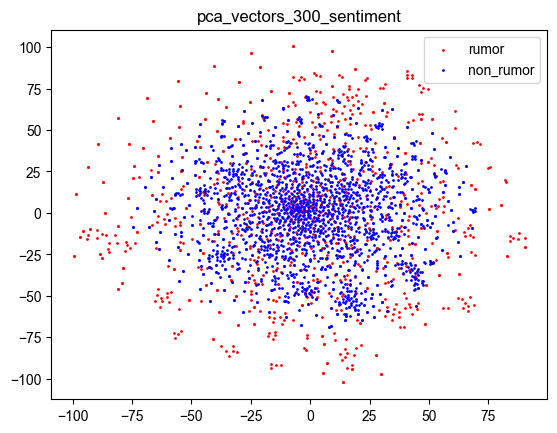

In [46]:
tsne_plot(pca_vectors_300_sentiment_rumor, pca_vectors_300_sentiment_non_rumor, 'pca_vectors_300_sentiment')

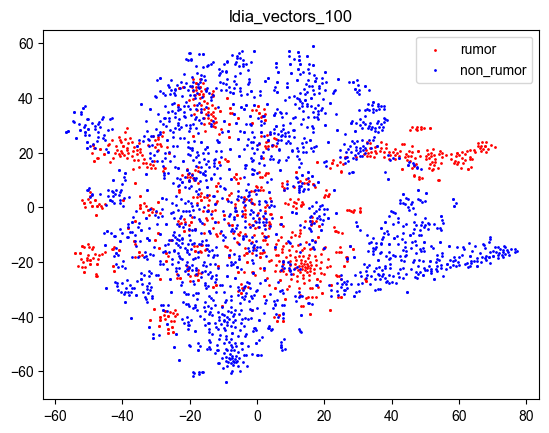

In [47]:
tsne_plot(ldia_vectors_100_rumor, ldia_vectors_100_non_rumor, 'ldia_vectors_100')

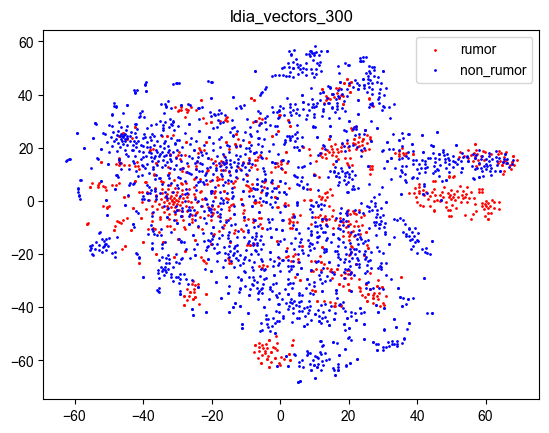

In [48]:
tsne_plot(ldia_vectors_300_rumor, ldia_vectors_300_non_rumor, 'ldia_vectors_300')

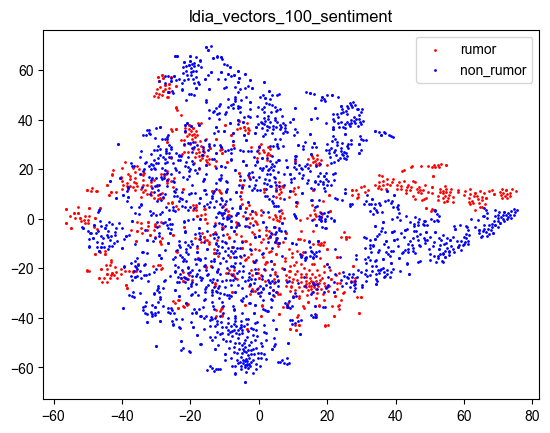

In [49]:
tsne_plot(ldia_vectors_100_sentiment_rumor, ldia_vectors_100_sentiment_non_rumor, 'ldia_vectors_100_sentiment')

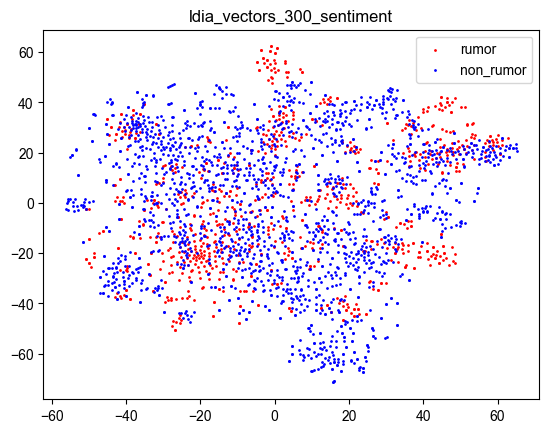

In [50]:
tsne_plot(ldia_vectors_300_sentiment_rumor, ldia_vectors_300_sentiment_non_rumor, 'ldia_vectors_300_sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


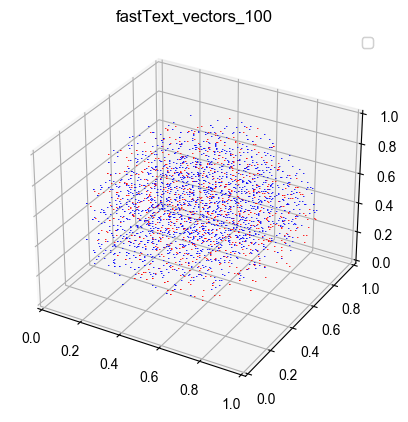

In [60]:
tsne_plot_3d(fastText_vectors_100_rumor, fastText_vectors_100_non_rumor, 'fastText_vectors_100')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


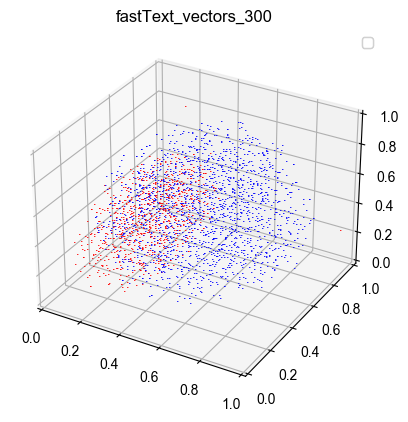

In [61]:
tsne_plot_3d(fastText_vectors_300_rumor, fastText_vectors_300_non_rumor, 'fastText_vectors_300')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


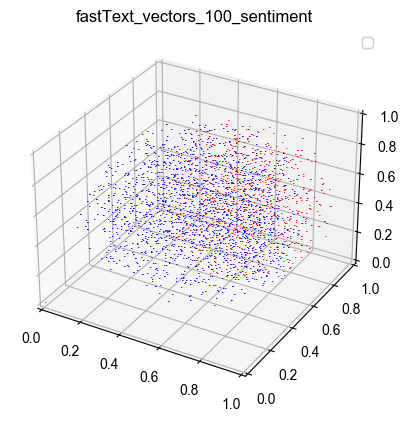

In [62]:
tsne_plot_3d(fastText_vectors_100_sentiment_rumor, fastText_vectors_100_sentiment_non_rumor, 'fastText_vectors_100_sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


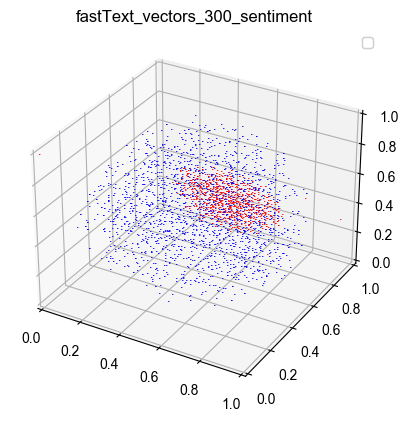

In [63]:
tsne_plot_3d(fastText_vectors_300_sentiment_rumor, fastText_vectors_100_sentiment_non_rumor, 'fastText_vectors_300_sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


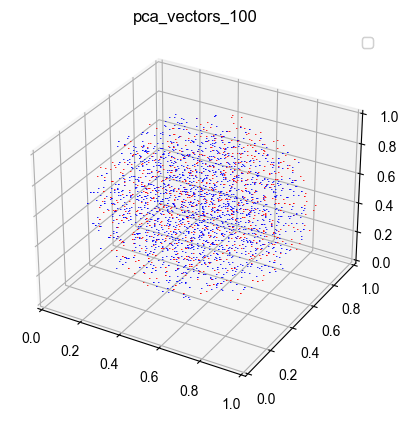

In [66]:
tsne_plot_3d(pca_vectors_100_rumor, pca_vectors_100_non_rumor, 'pca_vectors_100')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


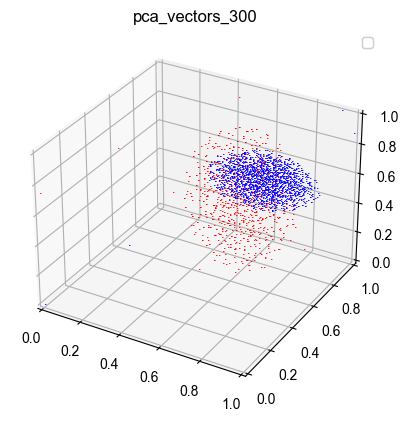

In [67]:
tsne_plot_3d(pca_vectors_300_rumor, pca_vectors_300_non_rumor, 'pca_vectors_300')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


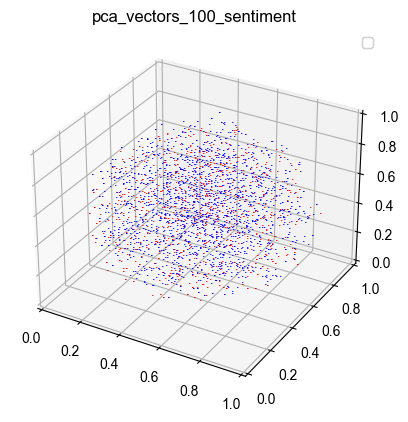

In [68]:
tsne_plot_3d(pca_vectors_100_sentiment_rumor, pca_vectors_100_sentiment_non_rumor, 'pca_vectors_100_sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


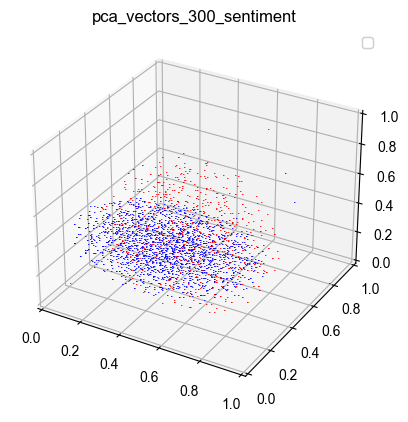

In [69]:
tsne_plot_3d(pca_vectors_300_sentiment_rumor, pca_vectors_300_sentiment_non_rumor, 'pca_vectors_300_sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


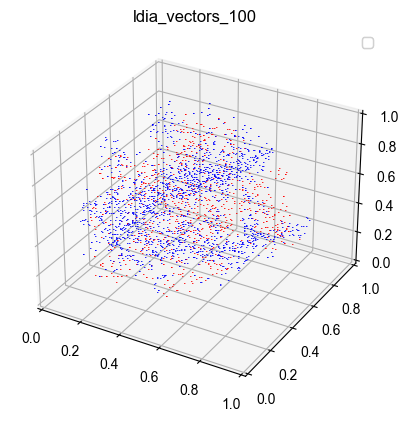

In [70]:
tsne_plot_3d(ldia_vectors_100_rumor, ldia_vectors_100_non_rumor, 'ldia_vectors_100')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


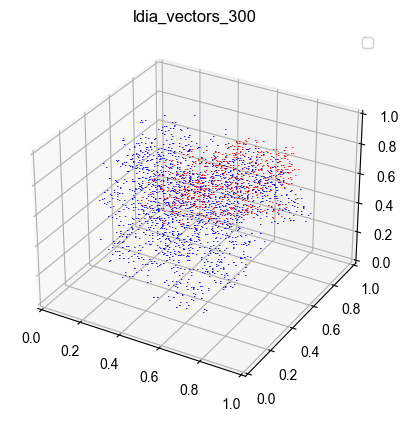

In [71]:
tsne_plot_3d(ldia_vectors_300_rumor, ldia_vectors_300_non_rumor, 'ldia_vectors_300')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


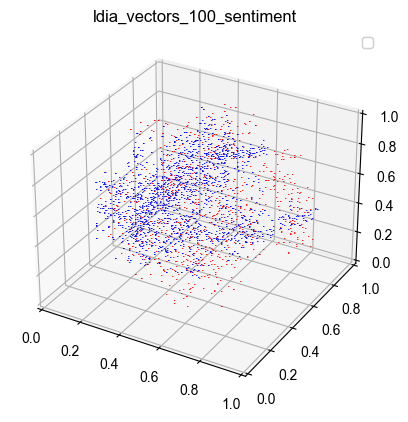

In [72]:
tsne_plot_3d(ldia_vectors_100_sentiment_rumor, ldia_vectors_100_sentiment_non_rumor, 'ldia_vectors_100_sentiment')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


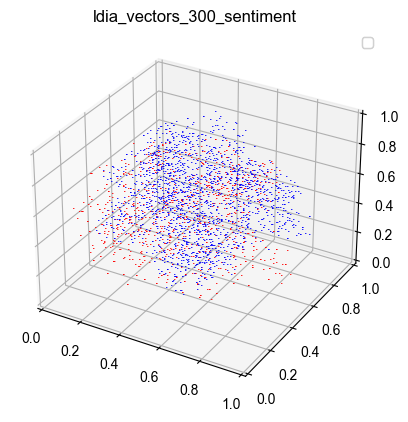

In [73]:
tsne_plot_3d(ldia_vectors_300_sentiment_rumor, ldia_vectors_300_sentiment_non_rumor, 'ldia_vectors_300_sentiment')

In [ ]:
fastText_pca_vectors_100_rumor = fastText_vectors_100_rumor + pca_vectors_100_rumor
fastText_pca_vectors_100_non_rumor = fastText_vectors_100_non_rumor + pca_vectors_100_non_rumor
fastText_pca_vectors_300_rumor = fastText_vectors_300_rumor + pca_vectors_300_rumor
fastText_pca_vectors_300_non_rumor = fastText_vectors_300_non_rumor + pca_vectors_300_non_rumor
fastText_pca_vectors_100_sentiment_rumor = fastText_vectors_100_sentiment_rumor + pca_vectors_100_sentiment_rumor
fastText_pca_vectors_100_sentiment_non_rumor = fastText_vectors_100_sentiment_non_rumor + pca_vectors_100_sentiment_non_rumor
fastText_pca_vectors_300_sentiment_rumor = fastText_vectors_300_sentiment_rumor + pca_vectors_300_sentiment_rumor
fastText_pca_vectors_300_sentiment_non_rumor = fastText_vectors_300_sentiment_non_rumor + pca_vectors_300_sentiment_non_rumor
fastText_ldia_vectors_100_rumor = fastText_vectors_100_rumor + ldia_vectors_100_rumor
fastText_ldia_vectors_100_non_rumor = fastText_vectors_100_non_rumor + ldia_vectors_100_non_rumor
fastText_ldia_vectors_300_rumor = fastText_vectors_300_rumor + ldia_vectors_300_rumor
fastText_ldia_vectors_300_non_rumor = fastText_vectors_300_non_rumor + ldia_vectors_300_non_rumor
fastText_ldia_vectors_100_sentiment_rumor = fastText_vectors_100_sentiment_rumor + ldia_vectors_100_sentiment_rumor
fastText_ldia_vectors_100_sentiment_non_rumor = fastText_vectors_100_sentiment_non_rumor + ldia_vectors_100_sentiment_non_rumor
fastText_ldia_vectors_300_sentiment_rumor = fastText_vectors_300_sentiment_rumor + ldia_vectors_300_sentiment_rumor
fastText_ldia_vectors_300_sentiment_non_rumor = fastText_vectors_300_sentiment_non_rumor + ldia_vectors_300_sentiment_non_rumor


In [ ]:
tsne_plot(fastText_pca_vectors_100_rumor, fastText_pca_vectors_100_non_rumor, 'fastText_pca_vectors_100')
tsne_plot_3d(fastText_pca_vectors_100_rumor, fastText_pca_vectors_100_non_rumor, 'fastText_pca_vectors_100')
